# Nombre: Vicente Soto valladares
# Curso: Data Analytics - Generación 106 (Desafío Latam)
## Desafío - Prueba Análisis estadístico con Python

## 1. Carga del dataset y exploración inicial

   En este paso:

- Cargamos el archivo cardio.csv.

- Revisamos dimensiones y primeras filas.

- Analizamos los tipos de datos y verificamos valores nulos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar dataset
df = pd.read_csv("cardio.csv")

# Dimensiones y primeras filas
print("Dimensiones:", df.shape)
display(df.head())

# Información general
print("\nInformación general:")
print(df.info())

# Valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Dimensiones: (4238, 16)


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
mem

## 2. Análisis descriptivo

  Calculamos estadísticas descriptivas de las principales variables numéricas:

- Promedio, mediana, desviación estándar.

- Valores mínimos y máximos.
Esto nos da una idea general de la distribución de los datos.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5


## 3. Distribución de variables clave

  Visualizamos la distribución de:

- Presión sistólica (sysBP)

- Presión diastólica (diaBP)

- Colesterol total (totChol)

- IMC (BMI)

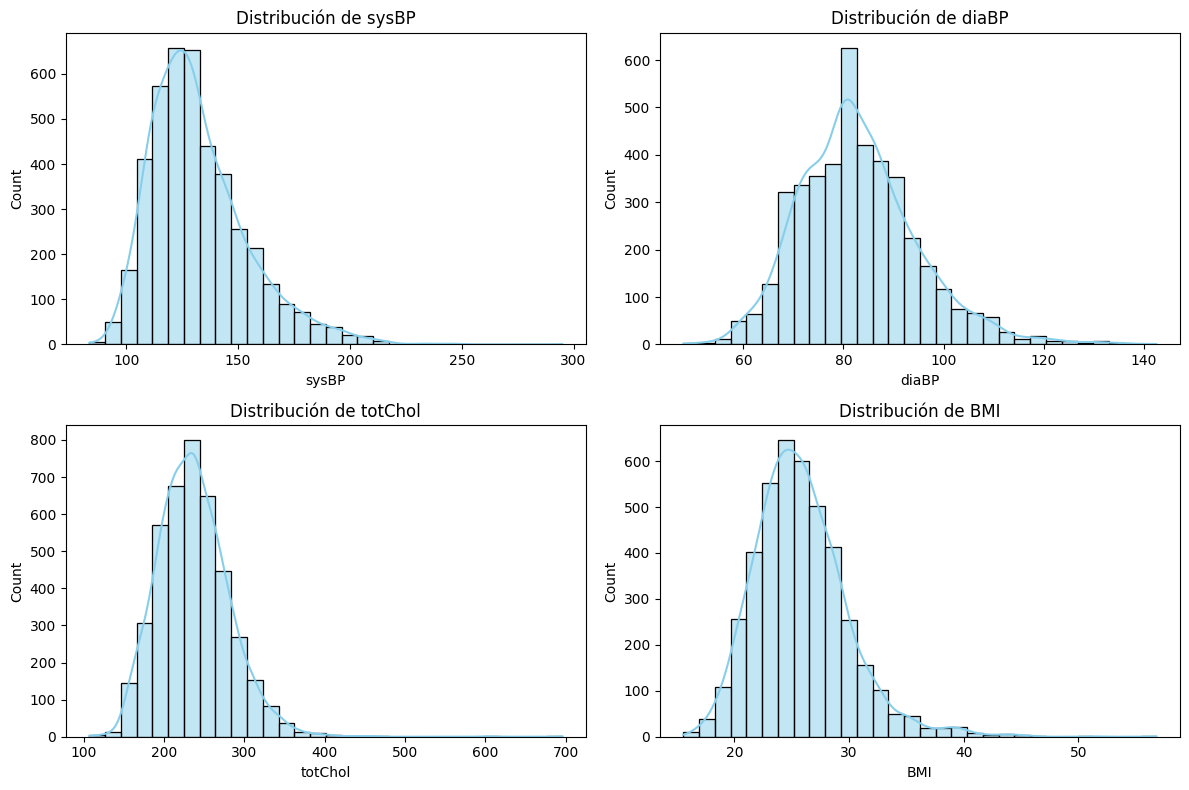

In [6]:
variables = ["sysBP", "diaBP", "totChol", "BMI"]

plt.figure(figsize=(12,8))
for i, var in enumerate(variables, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[var], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución de {var}")

plt.tight_layout()
plt.show()


## 4. Comparación entre fumadores y no fumadores

   Analizamos si hay diferencias en colesterol (totChol) y presión arterial (sysBP) entre fumadores y no fumadores.

C:\Users\Moonlab\AppData\Local\Temp\ipykernel_12160\1464365388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="currentSmoker", y="totChol", data=df, palette="Set2")
C:\Users\Moonlab\AppData\Local\Temp\ipykernel_12160\1464365388.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="currentSmoker", y="sysBP", data=df, palette="Set2")


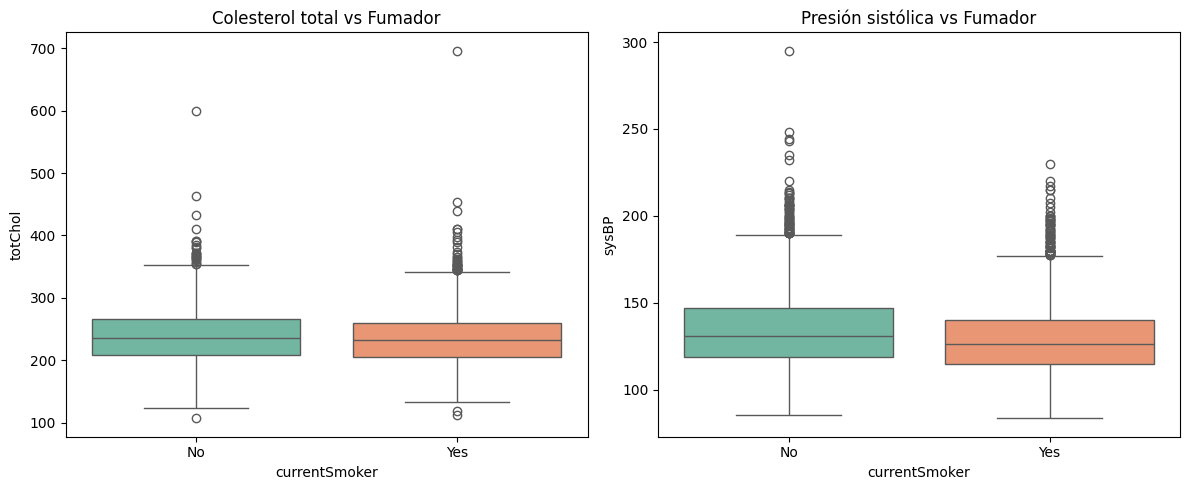

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="currentSmoker", y="totChol", data=df, palette="Set2")
plt.title("Colesterol total vs Fumador")

plt.subplot(1,2,2)
sns.boxplot(x="currentSmoker", y="sysBP", data=df, palette="Set2")
plt.title("Presión sistólica vs Fumador")

plt.tight_layout()
plt.show()


## 5. Prueba de hipótesis: ¿fumar afecta el colesterol?

  Aplicamos un t-test de dos muestras para comparar el colesterol de fumadores y no fumadores:

- H0: No hay diferencia significativa en colesterol entre fumadores y no fumadores.

- H1: Sí hay diferencia significativa.

In [8]:
fumadores = df[df["currentSmoker"] == "Yes"]["totChol"].dropna()
no_fumadores = df[df["currentSmoker"] == "No"]["totChol"].dropna()

t_stat, p_val = stats.ttest_ind(fumadores, no_fumadores, equal_var=False)

print("t-statistic:", round(t_stat,3))
print("p-value:", round(p_val,5))

if p_val < 0.05:
    print(" Se rechaza H0: existe diferencia significativa.")
else:
    print(" No se rechaza H0: no hay evidencia de diferencia significativa.")


t-statistic: -3.015
p-value: 0.00258
 Se rechaza H0: existe diferencia significativa.


## 6. ¿Es razonable afirmar que el ritmo cardíaco promedio es 75?

Planteamos la hipótesis estadística:

- H0 (hipótesis nula): El ritmo cardíaco promedio de la población es igual a 75.

- H1 (hipótesis alternativa): El ritmo cardíaco promedio de la población es distinto de 75.

Se aplica un t-test de una muestra sobre la variable heartRate.

In [11]:
# Extraemos la variable heartRate
hr = df["heartRate"].dropna()

print("Media muestral:", round(hr.mean(), 2))
print("Desviación estándar:", round(hr.std(), 2))
print("n:", len(hr))

# Prueba de hipótesis: H0: mu = 75
t_stat, p_val = stats.ttest_1samp(hr, popmean=75)
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 5))

if p_val < 0.05:
    print("Se rechaza H0: el ritmo cardiaco promedio difiere significativamente de 75.")
else:
    print("No se rechaza H0: no hay evidencia suficiente para decir que difiera de 75.")



Media muestral: 75.88
Desviación estándar: 12.03
n: 4237
t-statistic: 4.757
p-value: 0.0
Se rechaza H0: el ritmo cardiaco promedio difiere significativamente de 75.


## 7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día dentro de los fumadores?
Aquí filtramos solo a los fumadores actuales (currentSmoker == "Yes").
Luego comparamos la media de cigsPerDay entre hombres y mujeres.

 Hipótesis:

- H0: No hay diferencia significativa en el promedio de cigarrillos consumidos entre hombres y mujeres fumadores.

- H1: Sí existe una diferencia significativa.

Se aplica un t-test de dos muestras independientes.

In [13]:
# Filtrar solo fumadores
fumadores_df = df[df["currentSmoker"] == "Yes"]

# Separar por sexo
hombres = fumadores_df[fumadores_df["sex"] == "M"]["cigsPerDay"].dropna()
mujeres = fumadores_df[fumadores_df["sex"] == "F"]["cigsPerDay"].dropna()

print("Media cigarrillos (hombres fumadores):", round(hombres.mean(), 2))
print("Media cigarrillos (mujeres fumadoras):", round(mujeres.mean(), 2))

# Prueba t
t_stat, p_val = stats.ttest_ind(hombres, mujeres, equal_var=False)
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 5))

if p_val < 0.05:
    print("Se rechaza H0: existe diferencia significativa entre hombres y mujeres fumadores.")
else:
    print("No se rechaza H0: no hay evidencia de diferencia significativa.")


Media cigarrillos (hombres fumadores): 22.11
Media cigarrillos (mujeres fumadoras): 14.13
t-statistic: 18.109
p-value: 0.0
Se rechaza H0: existe diferencia significativa entre hombres y mujeres fumadores.


## 8. Modelo de Regresión Lineal 

En este paso construimos un modelo de regresión lineal para predecir el Índice de Masa Corporal (BMI) a partir de seis variables:

- Variables cuantitativas: age, totChol, sysBP, diaBP

- Variables cualitativas codificadas: sex_M, currentSmoker_Yes

Primero eliminamos las filas que contienen valores nulos para evitar errores en el entrenamiento del modelo. Luego dividimos los datos en conjuntos de entrenamiento y prueba (80% / 20%) y ajustamos el modelo de regresión lineal.

  Se evalúa el modelo usando:

- R²: Coeficiente de determinación, indica qué porcentaje de la variabilidad de BMI es explicado por las variables.

- RMSE: Error cuadrático medio, indica el error promedio de predicción en las mismas unidades de BMI.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables explicativas y target
X = df_reg[["age", "totChol", "sysBP", "diaBP", "sex_M", "currentSmoker_Yes"]]
y = df_reg["BMI"]

# Combinar y limpiar NaN en X e y
data_model = pd.concat([X, y], axis=1).dropna()

X = data_model.drop("BMI", axis=1)
y = data_model["BMI"]

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Evaluación
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)
print("[Train] R²:", r2_score(y_train, y_pred_train))
print("[Train] RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("[Test] R²:", r2_score(y_test, y_pred_test))
print("[Test] RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coeficientes: [ 0.00624986  0.00423611  0.01072659  0.10359636  0.78493133 -1.17724016]
Intercepto: 14.720389842540222
[Train] R²: 0.1720993333145141
[Train] RMSE: 3.7348594621947293
[Test] R²: 0.17835879524261478
[Test] RMSE: 3.5933980145180238


## 9. Modelo de Regresión Logística (Predicción de TenYearCHD)

En este paso construimos un modelo de regresión logística para predecir la probabilidad de que un paciente tenga enfermedad coronaria a 10 años (TenYearCHD).

- Variables predictoras seleccionadas: age, totChol, sysBP, BMI, glucose, sex_M, currentSmoker_Yes

- Target: TenYearCHD (0 = No, 1 = Sí)

Se revisa primero el balance de clases y luego se eliminan las filas con valores faltantes. Finalmente se divide en conjuntos de entrenamiento y prueba (80% / 20%) y se entrena el modelo. Se evalúa con accuracy, matriz de confusión y reporte de clasificación.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Revisar balanceo
print("Distribución TenYearCHD:")
print(df["TenYearCHD"].value_counts(normalize=True))

# Codificar variables categóricas
df_log = pd.get_dummies(df, columns=["sex", "currentSmoker"], drop_first=True)

# Variables predictoras y target
X = df_log[["age", "totChol", "sysBP", "BMI", "glucose", "sex_M", "currentSmoker_Yes"]]
y = df_log["TenYearCHD"]

# Eliminar filas con NaN
data_model = pd.concat([X, y], axis=1).dropna()
X = data_model.drop("TenYearCHD", axis=1)
y = data_model["TenYearCHD"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo logístico
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred))




Distribución TenYearCHD:
TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64
Accuracy: 0.8420365535248042

Matriz de confusión:
 [[641   6]
 [115   4]]

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       647
           1       0.40      0.03      0.06       119

    accuracy                           0.84       766
   macro avg       0.62      0.51      0.49       766
weighted avg       0.78      0.84      0.78       766



## 10. Separación de modelos por sexo con balanceo de clases

En este paso entrenamos dos modelos de regresión logística distintos, uno para Hombres y otro para Mujeres, considerando el desbalance de clases de TenYearCHD.

Se utiliza el parámetro class_weight='balanced' en LogisticRegression para que el modelo pondere automáticamente la clase minoritaria y mejore la predicción de pacientes con riesgo de enfermedad coronaria.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Dividir dataset por sexo
df_m = df_log[df_log["sex_M"] == 1]
df_f = df_log[df_log["sex_M"] == 0]

def entrenar_log_modelo(df_sub, label):
    # Variables predictoras y target
    X = df_sub[["age", "totChol", "sysBP", "BMI", "glucose", "currentSmoker_Yes"]]
    y = df_sub["TenYearCHD"]
    
    # Eliminar filas con NaN
    data_model = pd.concat([X, y], axis=1).dropna()
    X = data_model.drop("TenYearCHD", axis=1)
    y = data_model["TenYearCHD"]
    
    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar modelo con balanceo de clases
    modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Resultados
    print(f"\nResultados para {label}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte clasificación:\n", classification_report(y_test, y_pred))

# Entrenar y comparar
entrenar_log_modelo(df_m, "Hombres")
entrenar_log_modelo(df_f, "Mujeres")



Resultados para Hombres:
Accuracy: 0.6588235294117647
Reporte clasificación:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       276
           1       0.31      0.66      0.42        64

    accuracy                           0.66       340
   macro avg       0.60      0.66      0.59       340
weighted avg       0.78      0.66      0.69       340


Resultados para Mujeres:
Accuracy: 0.6666666666666666
Reporte clasificación:
               precision    recall  f1-score   support

           0       0.94      0.66      0.77       371
           1       0.24      0.73      0.36        55

    accuracy                           0.67       426
   macro avg       0.59      0.69      0.57       426
weighted avg       0.85      0.67      0.72       426



## Conclusión 

El análisis estadístico demostró que los factores de presión arterial (hipertensión y sysBP/diaBP) son variables críticas y estadísticamente significativas asociadas con el riesgo de sufrir una enfermedad coronaria (TenYearCHD) en los próximos diez años.